# XRAYVISION

## RHESSI 17
### 2018 June 18-22,  Trinity College Dublin
### Shane Maloney, Research fellow at TCD


# URL:   goo.gl/KuKZfy

# spacebar         - forward
# shift spacebar   - backward 


## What
* XRAY VISibility ImagiNg (XRAYVISION)
* Python library for Fourier type X-ray imagers
 * HXT, RHESSI, STX, ...
* Inputs are visibilities
 * Conversion from counts to visibilities left to instrument specific codes (e.g RHESSI IDL)
* Built on scientific python stack
* ESA Summer of Code in Space 2017 Péterffy Gábor

## What
![](images/intro_fig.png)

## What
* Numpy
 * Efficient array operations
* Matplotlib
* Astropy
 * WCS, Fits, Units, Coordinates
* SunPy
 * Maps, solar coordinates
 * Instruments

![python_stack.jpg](images/python_stack.jpg)

## Why

* Science should be _easily_ __reproducible__
* Software is the most used instrument
 * 15 - 50 errors per 1000 LOC (professional software developers/engineers)
* Software should be treated the same way we treat science ➡ evidence based
 * Tests
 * Only takes one counter example to prove wrong
* Understand the code/algorithms

 ## Why
 
* IDL
 * Licenses 💰
 * Poor support 🤠
 * Doesn't encourage good code ☹️ (frown)
* SSW (SSWIDL)
 * Documentation 😩 (weary)
 * Tests 😫 (distraught)
 * Path to contribute 😕 (confused)
 * Maintenance 😧 (anguished)
 * Stability 😓 (cold sweat)

## Code time

In [20]:
# Here are our imports (press shift+enter)
import numpy as np

from matplotlib import pyplot as plt
from astropy import units as u
from sunpy.map import Map

from xrayvision.visibility import RHESSIVisibility
from xrayvision.clean import clean, ms_clean
from xrayvision import SAMPLE_RHESSI_VISIBILITIES

plt.ion() # Don't have to call plt.show() all the time
plt.rcParams["figure.figsize"] = (10, 10)
plt.rcParams['font.size'] = 14

import warnings
warnings.simplefilter('ignore') #Pretty output for presentation

## Let's plot a RHESSI image 😎

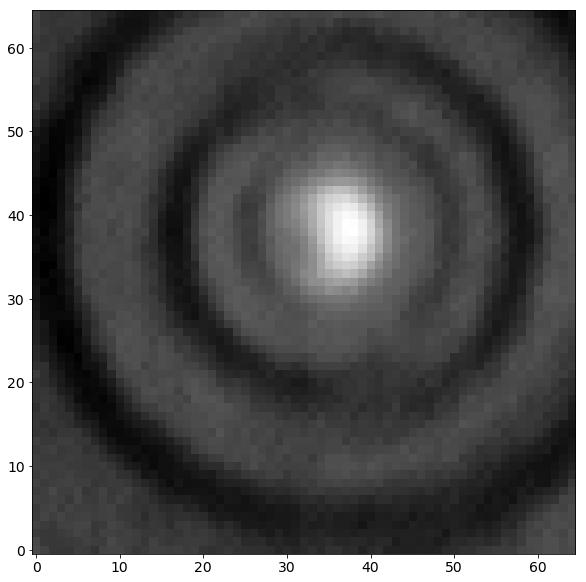

In [24]:
rhessi_vis = RHESSIVisibility.from_fits_file(SAMPLE_RHESSI_VISIBILITIES)
rhessi_image = rhessi_vis.to_image(shape=(65, 65), pixel_size=[3, 3]*u.arcsec)
plt.imshow(rhessi_image, origin='lower', cmap='Greys_r');

You can even change the code and update the plot in real-time!

That's ok but we can do better ... 

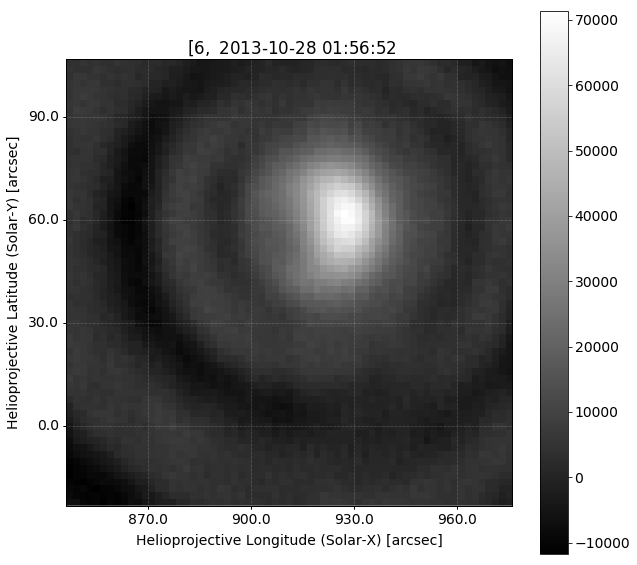

In [27]:
rhessi_map = rhessi_vis.to_map(shape=(65, 65), pixel_size=[2, 2]*u.arcsec)
rhessi_map.plot()
plt.colorbar();

In [4]:
rhessi_map

SunPy Map
---------
Observatory:		 RHESSI
Instrument:		 RHESSI
Detector:		 
Measurement:		 [ 6. 12.]
Wavelength:		 [ 6. 12.]
Observation Date:	 2013-10-28 01:56:52
Exposure Time:		 0.000000 s
Dimension:		 [65. 65.] pix
Coordinate System:	 helioprojective
Scale:			 [2. 2.] arcsec / pix
Reference Pixel:	 [33. 33.] pix
Reference Coord:	 [911.08380127  41.81555176] arcsec

array([[ -6786.41192486,  -6788.69023437,  -9558.49609114, ...,
          -165.63918737,  -2246.23817048,  -1115.78352373],
       [ -8546.28393465,  -9613.20166377, -10450.18098346, ...,
           896.95650771,  -1306.93662074,     40.95851186],
       [ -9272.6153593 ,  -9861.51516993,  -9460.65060812, ...,
          1915.00013811,   -325.89119675,   -359.4183666 ],
       ...,
       [  3923.96673697,   6302.06157491,   6371.91356881, ...,
         -5231.45748584,  -6363.01613851,  -6460.8237338 ],
       [  5033.61987325,   4173.09411523,   4399.33168977, ...,
         -6624.83552532,  -6012.03915468,  -6338.8047760

How about we clean the image

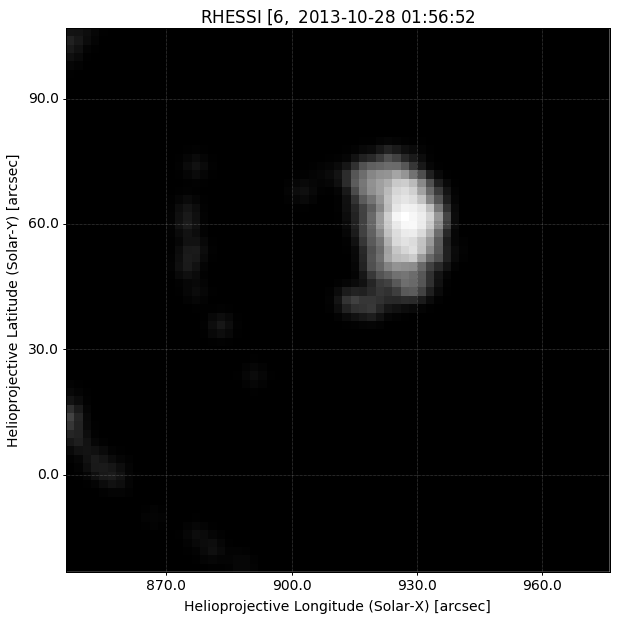

In [34]:
rhessi_vis.vis = np.ones(rhessi_vis.vis.shape)
dirty_beam = rhessi_vis.to_image(shape=(65 * 3, 65 * 3), pixel_size=[4., 4.] * u.arcsec)

clean_data, residuals = clean(dirty_map=rhessi_map.data, dirty_beam=dirty_beam,
                                             gain=0.05, niter=1000, clean_beam_width=1.0)

clean_map = Map((clean_data, rhessi_map.meta));
clean_map.plot(cmap='Greys_r');

What about multi-scale version of clean?

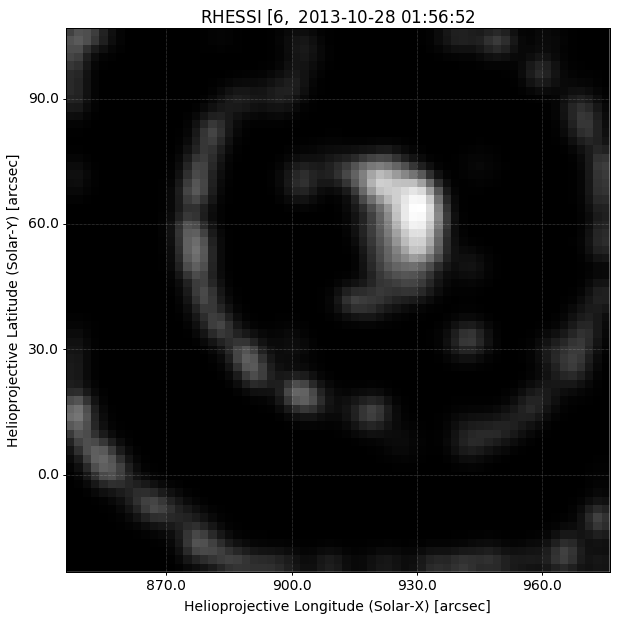

In [37]:
rhessi_vis.vis = np.ones(rhessi_vis.vis.shape)
dirty_beam = rhessi_vis.to_image(shape=(65 * 3, 65 * 3), pixel_size=[4., 4.] * u.arcsec)

ms_clean_data, ms_residuals = ms_clean(dirty_map=rhessi_map.data, dirty_beam=dirty_beam,
                                             gain=0.05, niter=5000, clean_beam_width=1.0, scales=[1,2,4])

ms_clean_map = Map((ms_clean_data, rhessi_map.meta));
ms_clean_map.plot(cmap='Greys_r');

 ## Comparison
 
 XRARVISION | SSW
- | - 
![alt](images/xrayvision_bp.png) | ![alt](images/ssw_bp.png)


 XRARVISION | SSW
- | - 
![alt](images/xrayvision_clean.png) | ![alt](images/ssw_clean.png)


## Current Status

* Still under heavy development
* Algorithms
 * CLEAN
 * MS-CLEAN
* Documentation on Read The Docs
* Automated builds and tests

## Future
* Low effort
 * Utility functions
 * Weighting uniform/natural
 * CLEAN windows
* Medium effort
 * Better representations for FITS files containing multiple times and energies
 * Visibility errors 
* Higher effort
 * MEM methods
 * VisPixon

## Future

* Newer algorithms
 * CNN
 * Compressed sensing
 * < your method here >

## XRAYVISION

### GitHub [github.com/sunpy/xrayvision](http://xrayvision.readthedocs.io/en/latest/xrayvision/)

### Documentation [xrayvision.readthedocs.io/en/latest/xrayvision/](xrayvision.readthedocs.io/en/latest/xrayvision/)

### Comments, critisims, pull requests all welcome